# Daniel Bairamian 260669560 
## ECSE 415 Computer Vision
### Assignment 2 Part One

In [1]:
# Defining Imports
import numpy as np
import cv2
import matplotlib.pyplot as plt
import copy
# need to pip install this one
# pip install imutils
import imutils

# 1. Invariance of SIFT Features

## 1.1 Invariance Under Changes in Scale

### 1.1.1

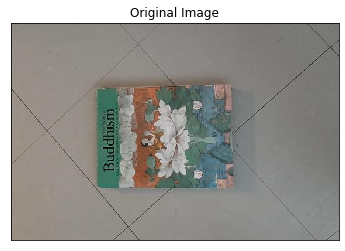

In [2]:
# load image
img = cv2.imread("book.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_disp = img.copy()

# show original image        
plt.title("Original Image")

# remove plot ticks
plt.xticks([]), plt.yticks([])

plt.imshow(img, cmap="gray")
plt.show()

In [3]:
# create a SIFT object
sift = cv2.xfeatures2d.SIFT_create()

# compute SIFT descriptors
keypoints,descriptors = sift.detectAndCompute(img, None)

# draw the keypoints
cv2.drawKeypoints(img, keypoints, img_disp, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


# display
plt.figure(figsize=(20,20))
plt.subplot(121), plt.imshow(img)
plt.title("Input Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_disp)
plt.title("SIFT Features"), plt.xticks([]), plt.yticks([])
plt.show()

# num of SIFT keypoints
print('Num keypoints: '+ str(len(keypoints)))

Num keypoints: 385


### 1.1.2

In [4]:
def show_images(images, cols , titles):
    
    n_images = len(images)
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        plt.xticks([]), plt.yticks([])
        plt.imshow(image, cmap="gray")
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

In [5]:
scale_factors = [0.2, 0.5, 0.8, 1.25, 2, 5]
H, W, _ = img.shape

titles = []
images = []

for scaleF in scale_factors:
    #scaledMat = cv2.getRotationMatrix2D((W/2, H/2), 0, scaleF)
    #scaledImg = cv2.warpAffine(img,scaledMat,(W,H))
    # rotation matrix gives clipping issue
    # using resize instead gives the correct result
    scaledImg = cv2.resize(img, (0,0), fx=scaleF, fy=scaleF) 

    images.append(scaledImg)
    titles.append("Scale Factor = " + str(scaleF))
    
show_images(images, len(images)/2, titles)

### 1.1.3

In [6]:
# create a SIFT object
sift = cv2.xfeatures2d.SIFT_create()

sift_images      = []
keypoints_list   = []
descriptor_list  = []

# deep copy to copy images by value not by reference
# did this so that in 1.1.6 we don't just see the matches
temp_images = copy.deepcopy(images)

for img_temp in temp_images:
    # compute SIFT descriptors
    k,d = sift.detectAndCompute(img_temp, None)
    # draw the keypoints
    cv2.drawKeypoints(img_temp, k, img_temp, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    sift_images.append(img_temp)
    keypoints_list.append(k)
    descriptor_list.append(d)

# here images will be shown at the same scale
# so even though they have been scaled, they will appear the same size
# however, the resolution has changed
show_images(sift_images, len(sift_images)/2, titles)


### 1.1.4

In [7]:
# create BFMatcher object
bf = cv2.BFMatcher()#cv2.NORM_HAMMING, crossCheck=True)

matches_list = []
# match descriptors together
for d in descriptor_list:
    match = bf.match(descriptors,d)
    matches_list.append(match)


### 1.1.5

In [8]:
for i in range (0, len(matches_list)):
    # Sort them in the order of their distance.
    matches_list[i] = sorted(matches_list[i], key = lambda x:x.distance)

### 1.1.6

In [9]:
matching_images = []
# zip over orignal images, keypoint list, and match list
for im_s, keyP, match_L in zip(images, keypoints_list, matches_list):
    # draw first 10 matches
    matching_im = cv2.drawMatches(img, keypoints, im_s,keyP, match_L[:10], None, flags=2)
    matching_images.append(matching_im)
    
show_images(matching_images, len(matching_images)/1, titles)

### 1.1.7

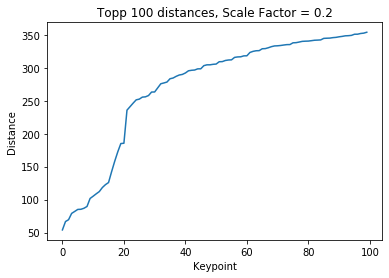

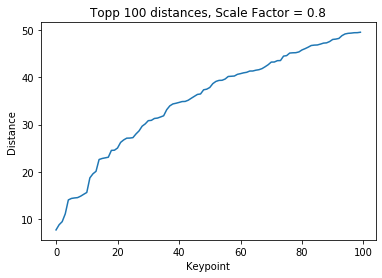

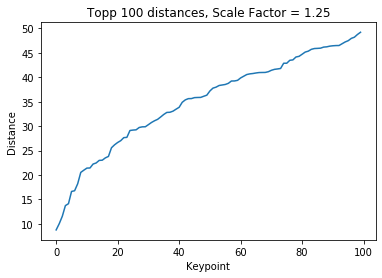

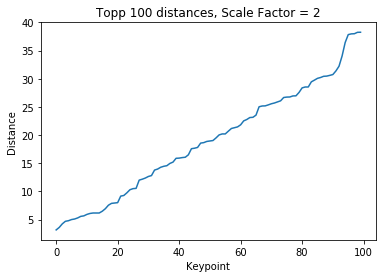

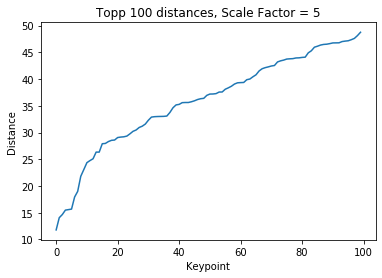

In [10]:
distances_multiarray = []
first_X_values = 100

x_100_vals = np.arange(first_X_values)

for match_L in matches_list:
    distance = []
    for m in match_L:
        distance.append(m.distance)
    distances_multiarray.append(distance[:first_X_values])

for dist, title in zip(distances_multiarray, titles):
    plt.plot(x_100_vals, dist)
    plt.title("Topp 100 distances, " + title)
    plt.xlabel("Keypoint")
    plt.ylabel("Distance")
    plt.show()


### 1.1.8

From the plots, we can see that the distance graph does not seem to vary that much for scale factors from 0.8 to 5, they all have ranges between 10 and 50. This is to be expected since we're using SIFT, which is **Scale Invariant**. 

However for the scale values of 0.5 and 0.2, the first few values seem to be similar, however the error seems to shoot up. Even though we're scale invariant, this is also to be expected, since the resolution of the images gets really small, and therefor there is a significant loss of information, which translates to a loss in sift keypoints


## 1.2 Invariance under Rotation

### 1.2.1

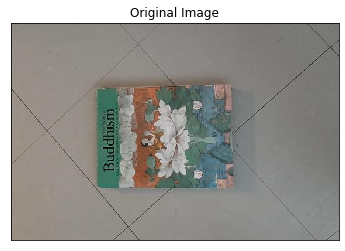

In [11]:
# load image
img = cv2.imread("book.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_disp = img.copy()

# show original image        
plt.title("Original Image")

# remove plot ticks
plt.xticks([]), plt.yticks([])

plt.imshow(img, cmap="gray")
plt.show()

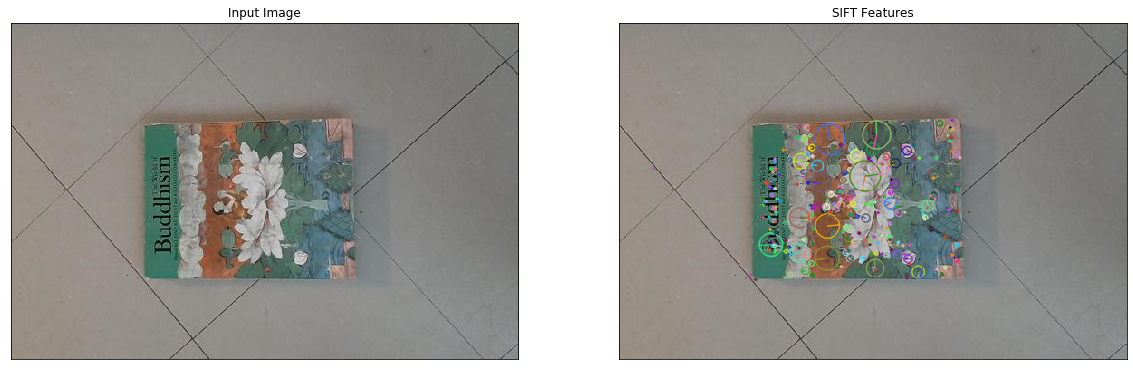

Num keypoints: 385


In [12]:
# create a SIFT object
sift = cv2.xfeatures2d.SIFT_create()

# compute SIFT descriptors
keypoints,descriptors = sift.detectAndCompute(img, None)

# draw the keypoints
cv2.drawKeypoints(img, keypoints, img_disp, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


# display
plt.figure(figsize=(20,20))
plt.subplot(121), plt.imshow(img)
plt.title("Input Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_disp)
plt.title("SIFT Features"), plt.xticks([]), plt.yticks([])
plt.show()

# num of SIFT keypoints
print('Num keypoints: '+ str(len(keypoints)))

### 1.2.2

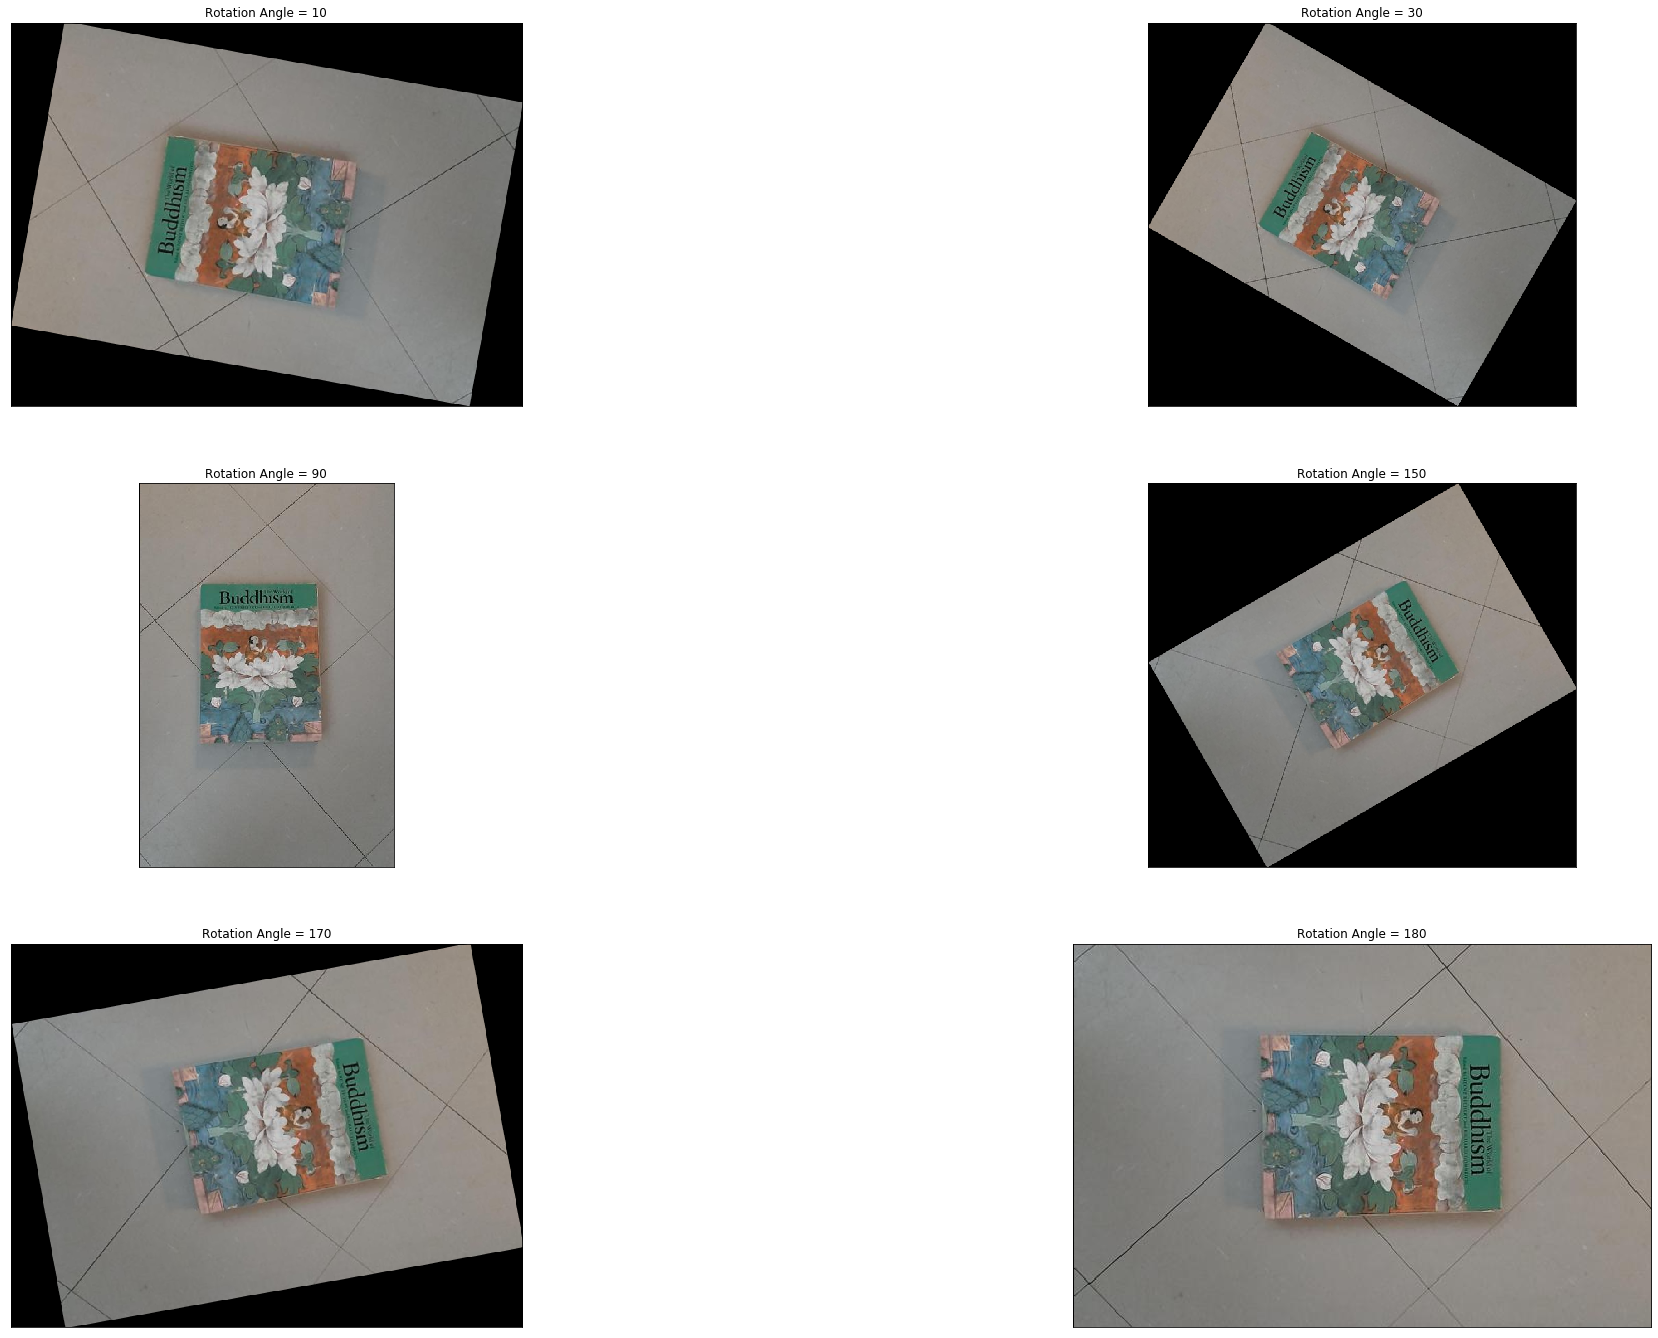

In [13]:
rotation_factors = [10,30,90,150,170,180]
H, W, _ = img.shape

titles = []
images = []

for rotF in rotation_factors:
    #scaledMat = cv2.getRotationMatrix2D((W/2, H/2), rotF, 1)
    #scaledImg = cv2.warpAffine(img,scaledMat,(W,H))
    scaledImg = imutils.rotate_bound(img, rotF)
    # rotation matrix gives clipping issue
    # instead use imutils.rotate_bound, which bounds the image
    # cv2 rotation clips the image's corners

    images.append(scaledImg)
    titles.append("Rotation Angle = " + str(rotF))
    
show_images(images, len(images)/2, titles)

### 1.2.3

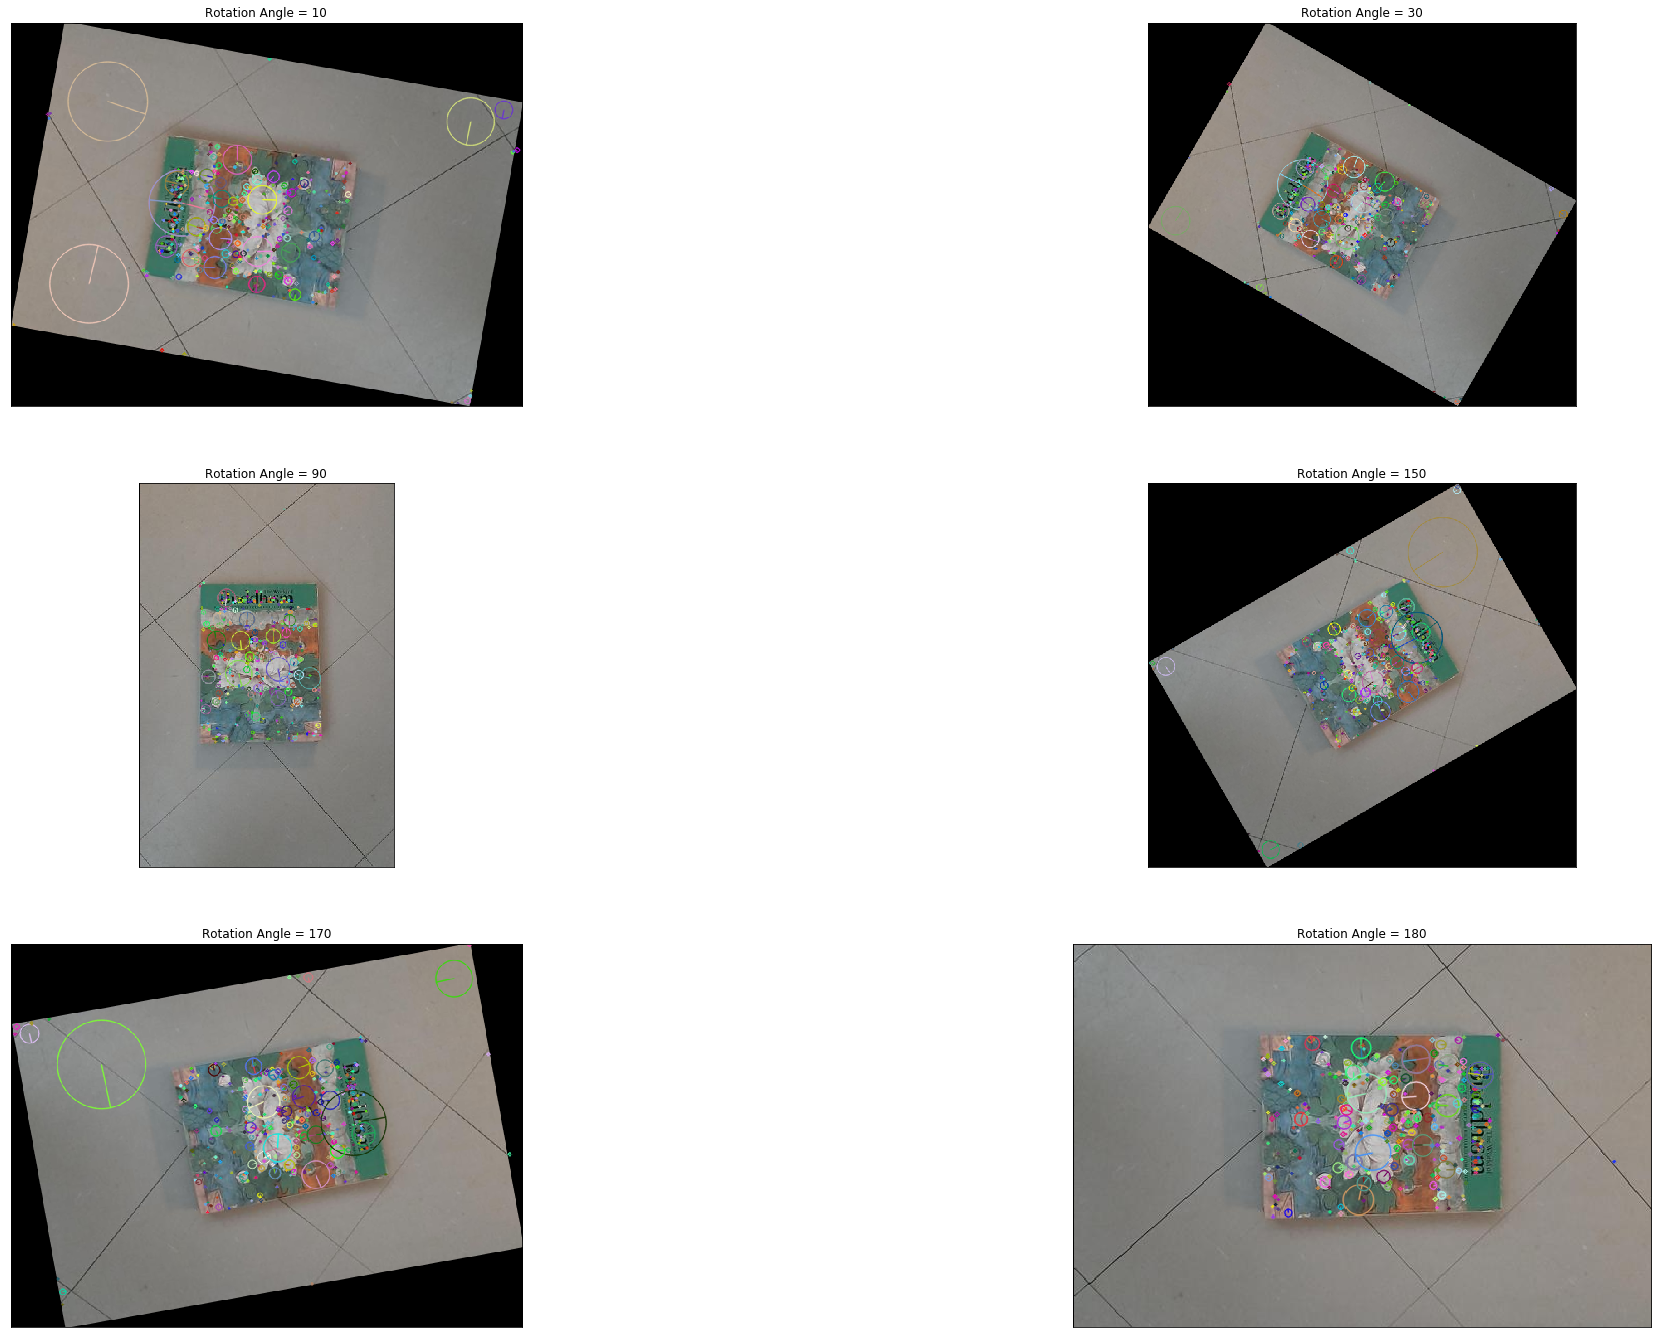

In [14]:
# create a SIFT object
sift = cv2.xfeatures2d.SIFT_create()

sift_images      = []
keypoints_list   = []
descriptor_list  = []

# deep copy to copy images by value not by reference
# did this so that in 1.1.6 we don't just see the matches
temp_images = copy.deepcopy(images)

for img_temp in temp_images:
    # compute SIFT descriptors
    k,d = sift.detectAndCompute(img_temp, None)
    # draw the keypoints
    cv2.drawKeypoints(img_temp, k, img_temp, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    sift_images.append(img_temp)
    keypoints_list.append(k)
    descriptor_list.append(d)

# here images will be shown at the same scale
# so even though they have been scaled, they will appear the same size
# however, the resolution has changed
show_images(sift_images, len(sift_images)/2, titles)


### 1.2.4

In [15]:
# create BFMatcher object
bf = cv2.BFMatcher()#cv2.NORM_HAMMING, crossCheck=True)

matches_list = []

for d in descriptor_list:
    match = bf.match(descriptors,d)
    matches_list.append(match)


### 1.2.5

In [16]:
for i in range (0, len(matches_list)):
    # Sort them in the order of their distance.
    matches_list[i] = sorted(matches_list[i], key = lambda x:x.distance)

### 1.2.6

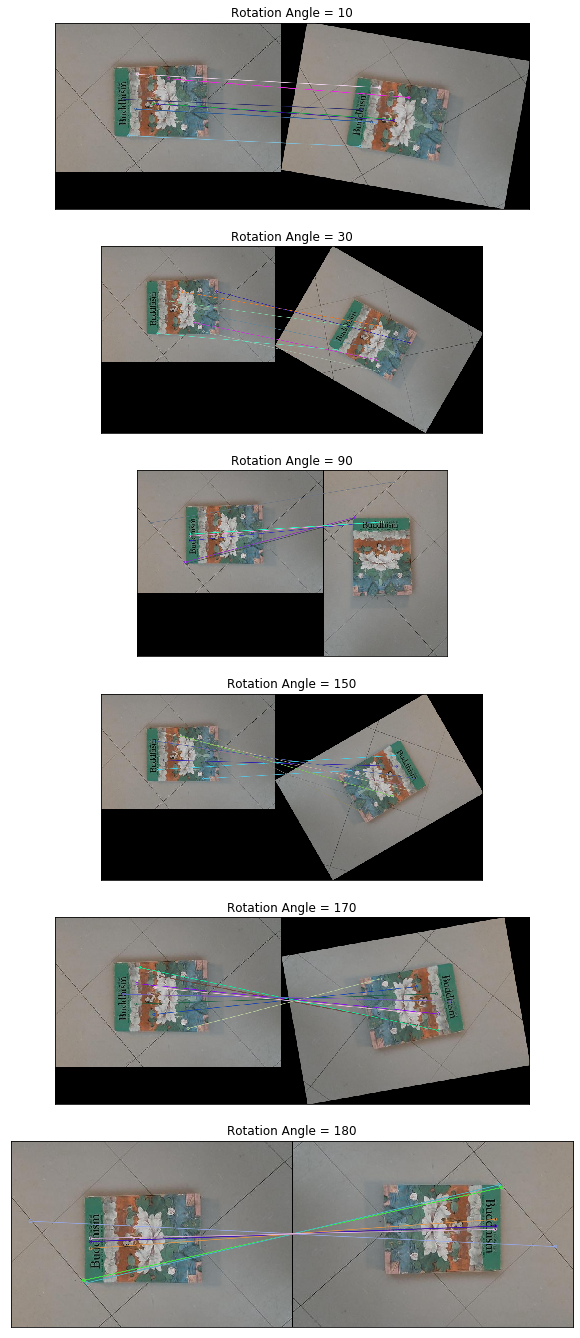

In [17]:
matching_images = []
# zip over orignal images, keypoint list, and match list
for im_s, keyP, match_L in zip(images, keypoints_list, matches_list):
    # draw first 10 matches
    matching_im = cv2.drawMatches(img, keypoints, im_s,keyP, match_L[:10], None, flags=2)
    matching_images.append(matching_im)
    
show_images(matching_images, len(matching_images)/1, titles)

### 1.2.7

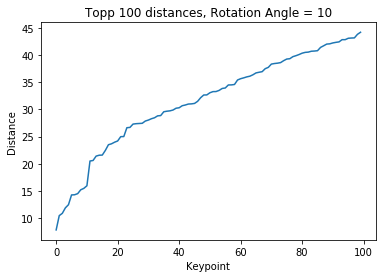

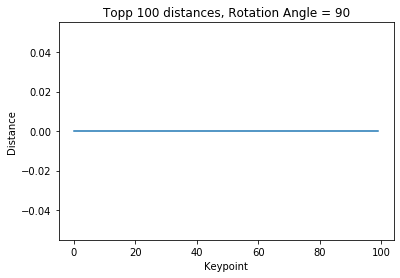

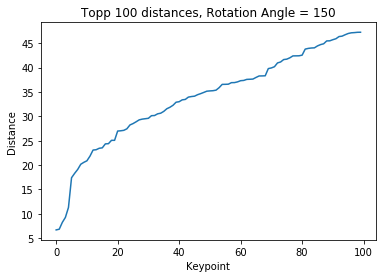

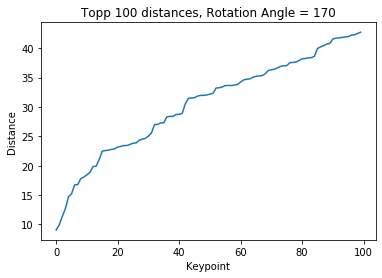

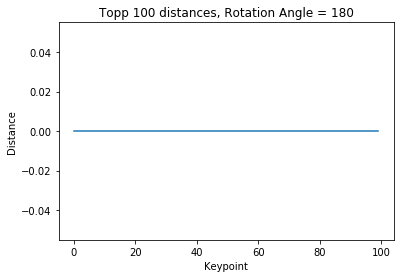

In [18]:
distances_multiarray = []
first_X_values = 100

x_100_vals = np.arange(first_X_values)

for match_L in matches_list:
    distance = []
    for m in match_L:
        distance.append(m.distance)
    distances_multiarray.append(distance[:first_X_values])

for dist, title in zip(distances_multiarray, titles):
    plt.plot(x_100_vals, dist)
    plt.title("Top 100 distances, " + title)
    plt.xlabel("Keypoint")
    plt.ylabel("Distance")
    plt.show()


### 1.2.8

Besides the 180 and 90 degrees rotation (which have 0 error), all other angle rotations all have the same relatively small error range (0 to 45). Even though SIFT is mainly use for scale invariance, it is also very robust to in-plane 2D rotation.

All of our rotations are 2D rotations around our "eye vector". None of our features ever go out of plane, or get a change in the view angle, which is why SIFT performs very well on the rotated images.